                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

<ipython-input-2-4628c5c0d306>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(item[0] * item[1] * 0.01) for item in pops_list]


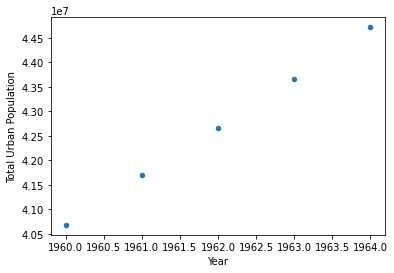

<ipython-input-2-4628c5c0d306>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]


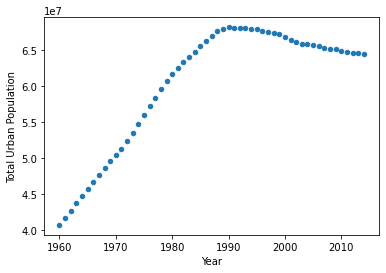

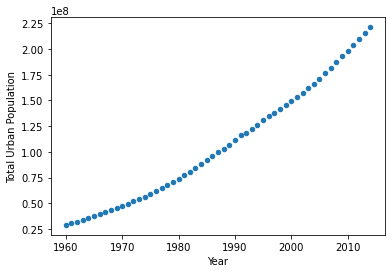

In [2]:
# Import the pandas package
import pandas as pd

import matplotlib.pyplot as plt


fn = 'datasets/world_ind_pop_data.csv'

# Initialize reader object: df_reader
df_reader = pd.read_csv(fn, chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))


# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv(fn, chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(item[0] * item[1] * 0.01) for item in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()



# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
